In [113]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [114]:
data=pd.read_csv('updated_final.csv')

In [115]:
data.head()

,AppName,TCID,STATUS,EXEDATE,ENV|CODE|DATA|REQ,TestCaseID,WeekDay,Special,Day Weight,Function,Defect,mWeekDay,mSpecial
0,OnePlan,1,Fail,1/1/2016,PROD2.0|import plotly|The plotly.plotly module...,10001,Friday,New Year,3,End to End,Data,3,5
1,OnePlan,2,Fail,1/2/2016,STG2.0|for x in range(10)|List out of index [1...,10002,Saturday,0,3,Cart Updation,Environment,3,0
2,OnePlan,3,Fail,1/3/2016,PROD2.0|Not compatible with IOS 13|Update not ...,10003,Sunday,0,4,Tag,Data,4,0
3,OnePlan,4,Pass,1/4/2016,0,10004,Monday,0,1,login,0,1,0
4,OnePlan,5,Pass,1/5/2016,0,10005,Tuesday,0,1,Custom Badging,0,1,0


In [116]:
data.columns


Index(['AppName', 'TCID', 'STATUS', 'EXEDATE', 'ENV|CODE|DATA|REQ',
       'TestCaseID', 'WeekDay', 'Special', 'Day Weight', 'Function', 'Defect',
       'mWeekDay', 'mSpecial'],
      dtype='object')

In [117]:
def day(date):
    return date.split('/')[1]
def month(date):
    return date.split('/')[0]


In [118]:
data["Day"]=data["EXEDATE"].apply(day)

In [119]:
data["Month"]=data["EXEDATE"].apply(month)

In [120]:
data

,AppName,TCID,STATUS,EXEDATE,ENV|CODE|DATA|REQ,TestCaseID,WeekDay,Special,Day Weight,Function,Defect,mWeekDay,mSpecial,Day,Month
0,OnePlan,1,Fail,1/1/2016,PROD2.0|import plotly|The plotly.plotly module...,10001,Friday,New Year,3,End to End,Data,3,5,1,1
1,OnePlan,2,Fail,1/2/2016,STG2.0|for x in range(10)|List out of index [1...,10002,Saturday,0,3,Cart Updation,Environment,3,0,2,1
2,OnePlan,3,Fail,1/3/2016,PROD2.0|Not compatible with IOS 13|Update not ...,10003,Sunday,0,4,Tag,Data,4,0,3,1
3,OnePlan,4,Pass,1/4/2016,0,10004,Monday,0,1,login,0,1,0,4,1
4,OnePlan,5,Pass,1/5/2016,0,10005,Tuesday,0,1,Custom Badging,0,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,WFM,361,Pass,12/27/2018,0,20956,Friday,0,3,Cart Updation,0,3,0,27,12
10956,WFM,362,Fail,12/28/2018,"STG2.0|for i,j in range()|range expected 1 arg...",20957,Saturday,0,3,Cart Updation,Requirement,3,0,28,12
10957,WFM,363,Fail,12/29/2018,"DEV2.0|for val in ""string"": |val : undefined v...",20958,Sunday,0,4,Tag,Environment,4,0,29,12
10958,WFM,364,Fail,12/30/2018,STG2.0|import matplotlib.pyplot as plt|matplot...,20959,Monday,0,1,Tag,Data,1,0,30,12


In [121]:
data['Function'].unique()

array(['End to End', 'Cart Updation', 'Tag', 'login', 'Custom Badging',
       'Subscribe', 'Register', 'Promo', 'Badging', 'Unsubscribe'],
      dtype=object)

In [122]:
data['Defect'].unique()

array(['Data', 'Environment', '0', 'Requirement', 'Functional'],
      dtype=object)

In [123]:
dict1={'Pass':1,"Fail":0}
#data.iloc[0,9]="Pass"
#for i in range(1,len(data)):
 #   data.iloc[i,9]=data.iloc[i-1,2]
dict2={'End to End':1, 'Cart Updation':2, 'Tag':3, 'login':4, 'Custom Badging':5,
       'Subscribe':6, 'Register':7, 'Promo':8, 'Badging':9, 'Unsubscribe':10}
dict3={'Data':1, 'Environment':2, '0.0':0, 'Requirement':3, 'Functional':4}

In [124]:
data

,AppName,TCID,STATUS,EXEDATE,ENV|CODE|DATA|REQ,TestCaseID,WeekDay,Special,Day Weight,Function,Defect,mWeekDay,mSpecial,Day,Month
0,OnePlan,1,Fail,1/1/2016,PROD2.0|import plotly|The plotly.plotly module...,10001,Friday,New Year,3,End to End,Data,3,5,1,1
1,OnePlan,2,Fail,1/2/2016,STG2.0|for x in range(10)|List out of index [1...,10002,Saturday,0,3,Cart Updation,Environment,3,0,2,1
2,OnePlan,3,Fail,1/3/2016,PROD2.0|Not compatible with IOS 13|Update not ...,10003,Sunday,0,4,Tag,Data,4,0,3,1
3,OnePlan,4,Pass,1/4/2016,0,10004,Monday,0,1,login,0,1,0,4,1
4,OnePlan,5,Pass,1/5/2016,0,10005,Tuesday,0,1,Custom Badging,0,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,WFM,361,Pass,12/27/2018,0,20956,Friday,0,3,Cart Updation,0,3,0,27,12
10956,WFM,362,Fail,12/28/2018,"STG2.0|for i,j in range()|range expected 1 arg...",20957,Saturday,0,3,Cart Updation,Requirement,3,0,28,12
10957,WFM,363,Fail,12/29/2018,"DEV2.0|for val in ""string"": |val : undefined v...",20958,Sunday,0,4,Tag,Environment,4,0,29,12
10958,WFM,364,Fail,12/30/2018,STG2.0|import matplotlib.pyplot as plt|matplot...,20959,Monday,0,1,Tag,Data,1,0,30,12


In [125]:
data["mSTATUS"]=data["STATUS"].map(dict1)
data["mFunction"]=data["Function"].map(dict2)
data["mDefect"]=data["Defect"].map(dict3)

In [39]:
#data["mAutoCorr"]=data["AutoCorr"].map(dict)

In [126]:
data

,AppName,TCID,STATUS,EXEDATE,ENV|CODE|DATA|REQ,TestCaseID,WeekDay,Special,Day Weight,Function,Defect,mWeekDay,mSpecial,Day,Month,mSTATUS,mFunction,mDefect
0,OnePlan,1,Fail,1/1/2016,PROD2.0|import plotly|The plotly.plotly module...,10001,Friday,New Year,3,End to End,Data,3,5,1,1,0,1,1.0
1,OnePlan,2,Fail,1/2/2016,STG2.0|for x in range(10)|List out of index [1...,10002,Saturday,0,3,Cart Updation,Environment,3,0,2,1,0,2,2.0
2,OnePlan,3,Fail,1/3/2016,PROD2.0|Not compatible with IOS 13|Update not ...,10003,Sunday,0,4,Tag,Data,4,0,3,1,0,3,1.0
3,OnePlan,4,Pass,1/4/2016,0,10004,Monday,0,1,login,0,1,0,4,1,1,4,NaN
4,OnePlan,5,Pass,1/5/2016,0,10005,Tuesday,0,1,Custom Badging,0,1,0,5,1,1,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,WFM,361,Pass,12/27/2018,0,20956,Friday,0,3,Cart Updation,0,3,0,27,12,1,2,NaN
10956,WFM,362,Fail,12/28/2018,"STG2.0|for i,j in range()|range expected 1 arg...",20957,Saturday,0,3,Cart Updation,Requirement,3,0,28,12,0,2,3.0
10957,WFM,363,Fail,12/29/2018,"DEV2.0|for val in ""string"": |val : undefined v...",20958,Sunday,0,4,Tag,Environment,4,0,29,12,0,3,2.0
10958,WFM,364,Fail,12/30/2018,STG2.0|import matplotlib.pyplot as plt|matplot...,20959,Monday,0,1,Tag,Data,1,0,30,12,0,3,1.0


In [127]:
model=LogisticRegression()
data1=pd.read_csv("future.csv")
x=data[data.AppName=="OnePlan"][["Day","Month","Day Weight"]]
y=data[data.AppName=="OnePlan"]["mSTATUS"]

In [128]:
week_weight={"Sunday":4,"Monday":1,"Tuesday":1,"Wednesday":1,"Thursday":1,"Friday":3,"Saturday":3}
data1["mWeekDay"]=data1["WeekDay"].map(week_weight)
data1.head()


,EXEDATE,STATUS,WeekDay,Special,Day Weight,mWeekDay
0,1/1/2019,NaN,Tuesday,New Year,NaN,1
1,1/2/2019,NaN,Wednesday,NaN,NaN,1
2,1/3/2019,NaN,Thursday,NaN,NaN,1
3,1/4/2019,NaN,Friday,NaN,NaN,3
4,1/5/2019,NaN,Saturday,NaN,NaN,3


In [129]:
special_weight={"Christmas":6,"Haloween":4,"Independence Day":4,"New Year":5,"Thanksgiving Week":6}
data1["mSpecial"]=data1["Special"].map(special_weight)
data1=data1.fillna(0)
data1.head()

,EXEDATE,STATUS,WeekDay,Special,Day Weight,mWeekDay,mSpecial
0,1/1/2019,0.0,Tuesday,New Year,0.0,1,5.0
1,1/2/2019,0.0,Wednesday,0,0.0,1,0.0
2,1/3/2019,0.0,Thursday,0,0.0,1,0.0
3,1/4/2019,0.0,Friday,0,0.0,3,0.0
4,1/5/2019,0.0,Saturday,0,0.0,3,0.0


In [130]:
l=len(data1)
for i in range(l):
    data1.iloc[i,4]=data1.iloc[i,5]+data1.iloc[i,6]
data1.head()

,EXEDATE,STATUS,WeekDay,Special,Day Weight,mWeekDay,mSpecial
0,1/1/2019,0.0,Tuesday,New Year,6.0,1,5.0
1,1/2/2019,0.0,Wednesday,0,1.0,1,0.0
2,1/3/2019,0.0,Thursday,0,1.0,1,0.0
3,1/4/2019,0.0,Friday,0,3.0,3,0.0
4,1/5/2019,0.0,Saturday,0,3.0,3,0.0


In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
data1["Day"]=data["EXEDATE"].apply(day)
data1["Month"]=data["EXEDATE"].apply(month)
data1

,EXEDATE,STATUS,WeekDay,Special,Day Weight,mWeekDay,mSpecial,Day,Month
0,1/1/2019,0.0,Tuesday,New Year,6.0,1,5.0,1,1
1,1/2/2019,0.0,Wednesday,0,1.0,1,0.0,2,1
2,1/3/2019,0.0,Thursday,0,1.0,1,0.0,3,1
3,1/4/2019,0.0,Friday,0,3.0,3,0.0,4,1
4,1/5/2019,0.0,Saturday,0,3.0,3,0.0,5,1
...,...,...,...,...,...,...,...,...,...
360,12/27/2019,0.0,Friday,0,3.0,3,0.0,26,12
361,12/28/2019,0.0,Saturday,0,3.0,3,0.0,27,12
362,12/29/2019,0.0,Sunday,0,4.0,4,0.0,28,12
363,12/30/2019,0.0,Monday,0,1.0,1,0.0,29,12


In [132]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier(max_depth=500)
clf = clf.fit(x_train,y_train)

In [133]:
y_pred = clf.predict(x_test)

In [134]:
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [136]:
y_test

7576    1
3729    1
7609    1
7316    0
7380    1
       ..
7383    1
7624    1
7348    1
7564    0
3687    0
Name: mSTATUS, Length: 329, dtype: int64

In [80]:
data1

,EXEDATE,STATUS,WeekDay,Special,Day Weight,mWeekDay,mSpecial,Day,Month
0,1/1/2019,0.0,Tuesday,New Year,6.0,1,5.0,1,1
1,1/2/2019,0.0,Wednesday,0,1.0,1,0.0,2,1
2,1/3/2019,0.0,Thursday,0,1.0,1,0.0,3,1
3,1/4/2019,0.0,Friday,0,3.0,3,0.0,4,1
4,1/5/2019,0.0,Saturday,0,3.0,3,0.0,5,1
...,...,...,...,...,...,...,...,...,...
360,12/27/2019,0.0,Friday,0,3.0,3,0.0,26,12
361,12/28/2019,0.0,Saturday,0,3.0,3,0.0,27,12
362,12/29/2019,0.0,Sunday,0,4.0,4,0.0,28,12
363,12/30/2019,0.0,Monday,0,1.0,1,0.0,29,12


In [81]:
data1["mSTATUS"]=y_pred
revdict={1:"Pass",0:"Fail"}
data1["STATUS"]=data1["mSTATUS"].map(revdict)

In [82]:
data=data.set_index(["AppName","EXEDATE"])
data1=data1.set_index("EXEDATE")

data
data1

,STATUS,WeekDay,Special,Day Weight,mWeekDay,mSpecial,Day,Month,mSTATUS
EXEDATE,,,,,,,,,
1/1/2019,Fail,Tuesday,New Year,6.0,1,5.0,1,1,0
1/2/2019,Fail,Wednesday,0,1.0,1,0.0,2,1,0
1/3/2019,Pass,Thursday,0,1.0,1,0.0,3,1,1
1/4/2019,Fail,Friday,0,3.0,3,0.0,4,1,0
1/5/2019,Fail,Saturday,0,3.0,3,0.0,5,1,0
...,...,...,...,...,...,...,...,...,...
12/27/2019,Pass,Friday,0,3.0,3,0.0,26,12,1
12/28/2019,Fail,Saturday,0,3.0,3,0.0,27,12,0
12/29/2019,Fail,Sunday,0,4.0,4,0.0,28,12,0


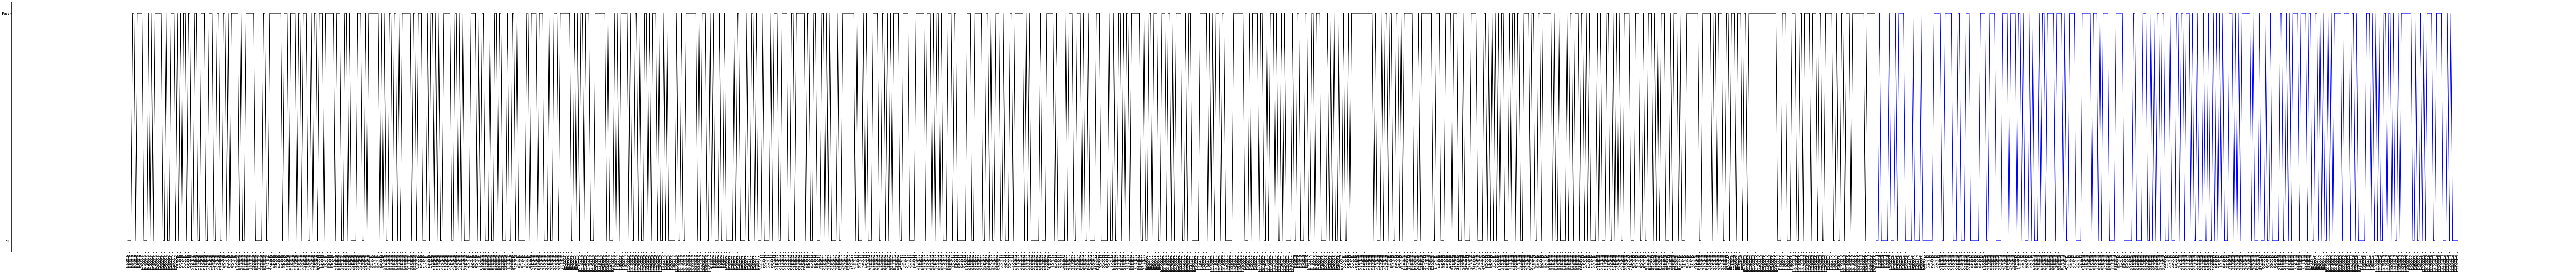

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(150,15))
plt.plot(data.loc[("OnePlan",),"STATUS"],color="black")
plt.plot(data1.loc[:,"STATUS"],color="blue")
plt.xticks(rotation=90)
plt.show()